In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [13]:
raw_data = np.loadtxt(open("EEG.csv", "rb"), delimiter=",", skiprows=0)
X_raw = raw_data[:,:-1]

# Data cleaning on X
upper_threshold = 4600
lower_threshold = 4000
too_big = X_raw>upper_threshold
too_small = X_raw<lower_threshold
X_cleaned = np.copy(X_raw)
X_cleaned[too_big] = upper_threshold
X_cleaned[too_small] = lower_threshold

X = (X_cleaned - np.mean(X_cleaned)) / np.std(X_cleaned)
y = raw_data[:,-1]

In [14]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

In [15]:
Open = y==1
Close = y==0

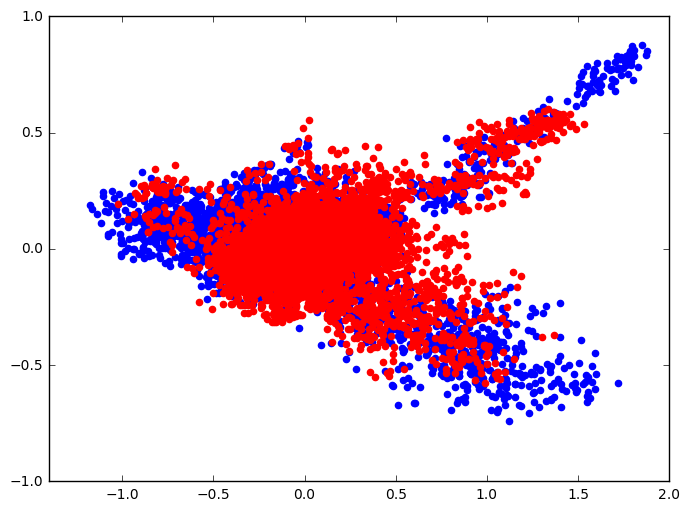

In [18]:
plt.scatter(X_r[Close,0],X_r[Close,1],color="blue")
plt.scatter(X_r[Open,0],X_r[Open,1],color="red")
plt.xlim([-1.4,2])
plt.ylim([-1,1])
plt.show()